Also, think about these five terminologies as we will use a lot in DS 2.1:  
1- What is X_train?  
2- What is y_train?  
3- What is X_test?  
4- What is y_test?  
5- What is .y_pred (y_prediction)?  


In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.datasets import make_blobs

df = pd.read_csv("data/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

#Instansiate the model (Linear Regression) and train it
lr_reg = LinearRegression()
lr_reg.fit(X_train, Y_train)

print(lr_reg.coef_)
print(lr_reg.intercept_)

#Predict the botton 50 companies' sales
X_test = df[feature_cols][-50:]
Y_test = df.sales[-50:]

print("Predicting the sales of the bottom 50 companies (last ones)")
print(lr_reg.predict(X_test))

print(lr_reg.score(X_test, Y_test)) 

[ 0.04700012  0.17993257 -0.00140273]
3.029766796293691
Predicting the sales of the bottom 50 companies (last ones)
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]
0.8963519785440216


In [9]:
lr_reg.predict([[197.6, 23.3, 14.2]])

array([16.48950045])

# Support Vector Machines

In [10]:
brain = pd.read_csv('data/SVM_Dataset1.txt', index_col=0)
brain

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


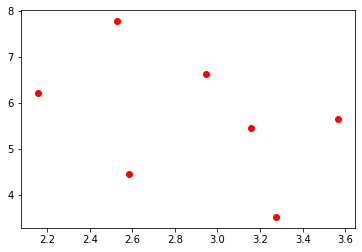

In [11]:
import matplotlib.pyplot as plt
plt.scatter(brain['X1'], brain['X2'], c= 'r')

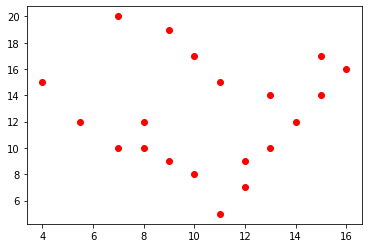

In [20]:
brain2 = pd.read_csv('data/SVM_Dataset2.txt')
brain2.columns
plt.scatter(brain2['x1'], brain2['x2'], c= 'r')

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


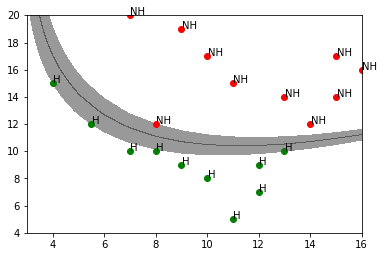

In [36]:
X1=brain2['x1']
X2=brain2['x2']

X_train=np.array(list(zip(X1,X2)))
y_train=brain2['y'].values

svm_classifier = svm.SVC(kernel='poly',C=10)
svm_classifier.fit(X_train, y_train)

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
        
        
colors = []
for k in y_train:
    if k == 1:
        colors.append('g')
    else:
        colors.append('r')

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())  

plot_decision_boundary(svm_classifier, X_train, y_train)        
        
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c=colors[k])
    plt.text(i+0.02, j+0.02, label[k])
    